In [12]:
import numpy as np
from scipy.linalg import *
import scipy as sp
import matplotlib.pyplot as plt
from sympy import *
import math

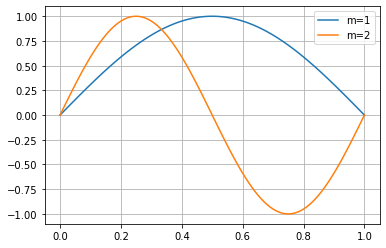

In [2]:
m = np.arange(1, 3)
def calcψ_m(m, x, a=1):
    return np.sin(m*np.pi*x/a)
a=1
x = np.arange(0, a*1.01, a*0.01)
ψ_m = np.zeros((len(m), len(x)))
for i in m:
    ψ_m[i-1] = calcψ_m(i, x)
    plt.plot(x, ψ_m[i-1], label="m="+str(m[i-1]))

plt.legend()
plt.grid()

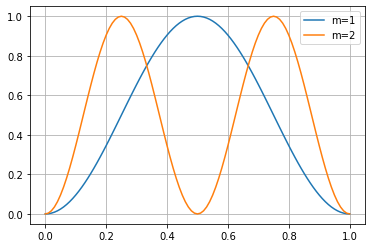

In [3]:
for i in m:
    plt.plot(x, ψ_m[i-1]**2, label="m="+str(m[i-1]))

plt.legend()
plt.grid()

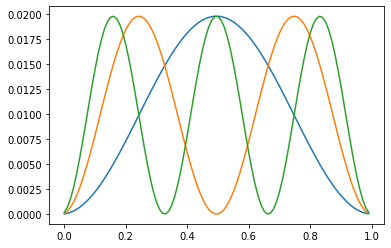

In [4]:
L = 1 # Length of the domain
N = 100 # Number of discrete points
dx = L/N
A = np.zeros((N, N)) # Hamiltonian matrix
m = np.arange(1, 4) # Number of the eigenstate to be calculated
for i in range(N): # Fill the Hamiltonian matrix with elements appropriate for an infinite square well problem
    for j in range(N):
        A[i, j] = 0
        if(i == j):
            A[i, j] = -2
        if(i == j-1 or i == j+1):
            A[i, j] = 1

λ, v = eigh(A) # Solve the eigensystem
xaxis = np.arange(N)*dx
soln = np.zeros((len(m), N))
for i in m:
    soln[i-1] = v[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, soln[i-1]**2)

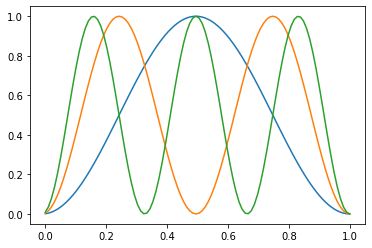

In [5]:
n = np.arange(N)+1
k=0
l=0
ϕ = np.sin((np.pi)*(n[l:]-k)*n[:, None]/N)
A = np.zeros((N, N)) # Hamiltonian matrix
#m = np.arange(1, 4) # Number of the eigenstate to be calculated
for i in range(N): # Fill the Hamiltonian matrix with elements appropriate for an infinite square well problem
    for j in range(N):
        A[i, j] = 0
        if(i == j):
            A[i, j] = -2
        if(i == j-1 or i == j+1):
            A[i, j] = 1
#ϕ = np.nan_to_num(ϕ)
#plot_shapes(N, ϕ[:,:3])
#est_evals, est_evecs = red_eigh(ϕ, K, M)
red_A = ϕ.T@A@ϕ
est_evals, est_evecs = eigh(red_A)
V = ϕ@est_evecs
xaxis = np.linspace(0, 1, N-l)
soln = np.zeros((len(m), N-l))
for i in m:
    soln[i-1] = V[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, (soln[i-1]**2))

In [54]:
p = Symbol('p') #Symbol for the x-axis
q = Symbol('q') #Symbol for m
r = Symbol('r') #Symbol for n
y = (p**q)*(p-1)**q #ϕ_q
#z = (p**r)*(p-1)**r
ϕ_m = lambdify([p, q], y, 'numpy') #Turn ϕ_q into a function to return a ϕ_m with an input x list
#zprime = z.diff(p)
#zdprime = zprime.diff(p)
#ϕiHϕj = y*zdprime
#h = integrate(ϕiHϕj, (p, 0, 1))
#H = lambdify([p, q, r], h, 'numpy')
h = np.sqrt(np.pi)*q*r*((-1)**(q+r+1))*(2**(-2*(q+r-1)))*gamma(q + r - 1)/gamma(q + r + 1/2) #This is the closed form of the integral from
                                                                                             #0 to 1 of ϕ_i* H ϕ_j dx
H = lambdify([q, r], h, 'numpy') #Turn h into a function to return a value of energy for a given m and n

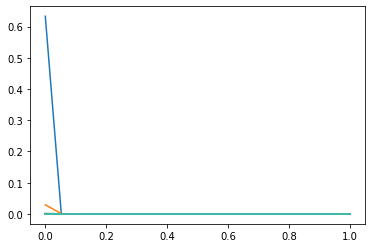

In [103]:
xaxis = np.linspace(0, 1, 20)
m = np.arange(1, 21)
#A = np.zeros((3, 3))
#for i in range(3): # Fill the Hamiltonian matrix with elements appropriate for an infinite square well problem
#    for j in range(3):
#       A[i, j] = 0

#A[0, 0] = -1/3
#A[1, 1] = -2/105
#A[2, 2] = -1/770
A = np.empty((len(m), len(m)))
for i in m:
    for j in m:
        A[i-1, j-1] = H(float(i), float(j)) #Set each element of the matrix A (the Hamiltonian matrix) to the calculated expectation value of
                                            #the Hamiltonian for a given m and n

ϕ = np.empty((len(m), len(xaxis))) 
for i in m:
    ϕ[i-1] = ϕ_m(xaxis, m[i-1]) #Create a matrix of the basis functions over x for each m

red_A = ϕ.T@A@ϕ #Reduce A
λ, v = eigh(A) #Compute eigenvalues and vectors
est_evals, est_evecs = eigh(red_A) #Compute estimated eigenvalues and vectors
V = ϕ@est_evecs #Still not entirely sure what this step does
soln = np.zeros((len(m), len(xaxis)))
for i in m:
    soln[i-1] = V[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, (soln**2)[i-1])

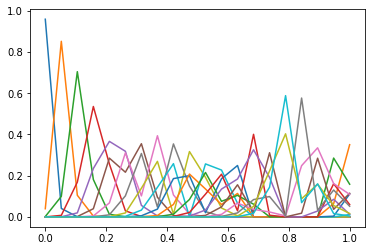

In [97]:
for i in m:
    plt.plot(xaxis, (v**2)[i-1])

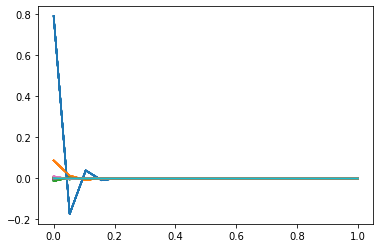

In [102]:
ϕ2 = inv(A)@ϕ
red_A = ϕ2.T@A@ϕ2
est_evals, est_evecs = eigh(red_A)
V = ϕ@est_evecs
soln = np.zeros((len(m), len(xaxis)))
for i in m:
    soln[i-1] = V[i-1] # Fill the vector "soln" with the wavefunction values
    #plt.plot(xaxis, λ)
    #plt.plot(xaxis, est_evals)
    plt.plot(xaxis, V)

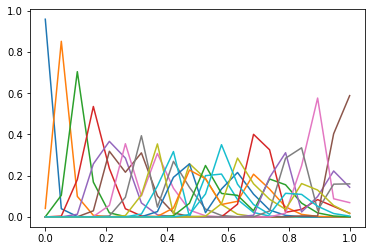

In [99]:
plt.plot(xaxis, v**2);

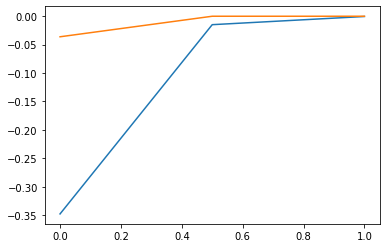

In [648]:
plt.plot(xaxis, λ)
plt.plot(xaxis, est_evals)

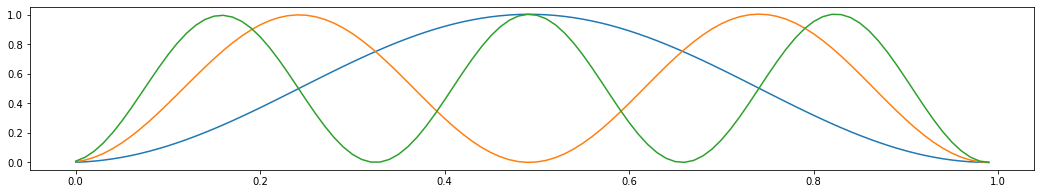

In [505]:
ϕ2 = inv(A)@ϕ
red_A = ϕ2.T@A@ϕ2
est_evals, est_evecs = eigh(red_A)
V = ϕ@est_evecs
xaxis = np.arange(N-l)*dx
soln = np.zeros((len(m), N-l))
for i in m:
    soln[i-1] = V[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, soln[i-1]**2)

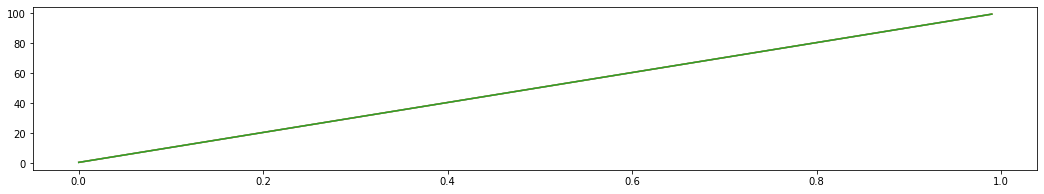

In [506]:
L = 1 # Length of the domain
N = 100 # Number of discrete points
dx = L/N
A = np.zeros((N, N)) # Hamiltonian matrix
m = np.arange(1, 4) # Number of the eigenstate to be calculated
for i in range(N): # Fill the Hamiltonian matrix with elements appropriate for an infinite square well problem
    for j in range(N):
        A[i, j] = 0
        if(i == j):
            A[i, j] = (1/2)+i

λ, v = eigh(A) # Solve the eigensystem
xaxis = np.arange(N)*dx
soln = np.zeros((len(m), N))
for i in m:
    soln[i-1] = v[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, λ)

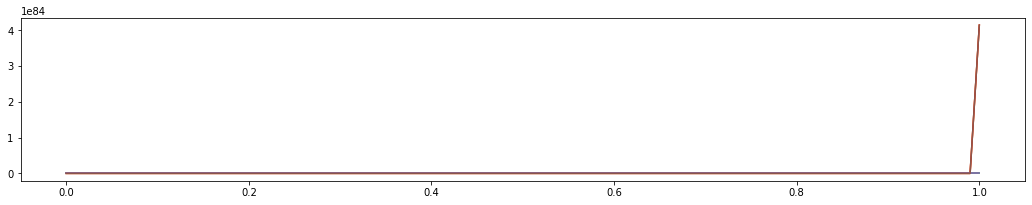

In [514]:
n = np.arange(N)+1
k=0
l=0
ϕ = np.sin((np.pi)*(n[l:]-k)*n[:, None]/N)*np.exp((n[l:]-k)*n[:, None]/N)
#ϕ = np.nan_to_num(ϕ)
#plot_shapes(N, ϕ[:,:3])
#est_evals, est_evecs = red_eigh(ϕ, K, M)
red_A = ϕ.T@A@ϕ
est_evals, est_evecs = eigh(red_A)
V = ϕ@est_evecs
xaxis = np.linspace(0, 1, N-l)
soln = np.zeros((len(m), N-l))
for i in m:
    soln[i-1] = V[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, λ)
    plt.plot(xaxis, est_evals)

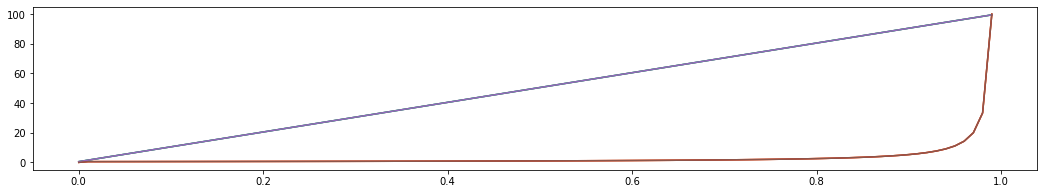

In [508]:
ϕ2 = inv(A)@ϕ
red_A = ϕ2.T@A@ϕ2
est_evals, est_evecs = eigh(red_A)
V = ϕ@est_evecs
xaxis = np.arange(N-l)*dx
soln = np.zeros((len(m), N-l))
for i in m:
    soln[i-1] = V[i-1] # Fill the vector "soln" with the wavefunction values
    plt.plot(xaxis, λ)
    plt.plot(xaxis, est_evals)